# Generating An Imbalanced Binary Dataset

In [1]:
import sklearn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# define an imbalanced binary dataset
# 2 informative features
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, n_classes=2,
    n_redundant=0, n_repeated=0,class_sep=0.75,random_state=0)

In [3]:
# convert to pandas Dataframe
imb_df = pd.DataFrame(X, columns = ['X1','X2'])
imb_df['y'] = y

# Examine Dataset

In [4]:
imb_df.head()

,X1,X2,y
0,-1.454271,0.051335,0
1,-0.932579,0.987785,0
2,-1.175119,-0.076657,0
3,-0.252433,1.835165,0
4,-0.990769,1.381667,0


In [5]:
imb_df.describe()

,X1,X2,y
count,2000.000000,2000.000000,2000.000000
mean,-0.740147,0.718249,0.010000
std,0.436214,0.698339,0.099524
min,-2.058849,-1.684109,0.000000
25%,-1.025851,0.238907,0.000000
50%,-0.737714,0.728228,0.000000
75%,-0.469421,1.185072,0.000000
max,0.943081,3.740447,1.000000


In [6]:
# Get frequency of classes in the dataset
imb_df['y'].value_counts()

0    1980
1      20
Name: y, dtype: int64

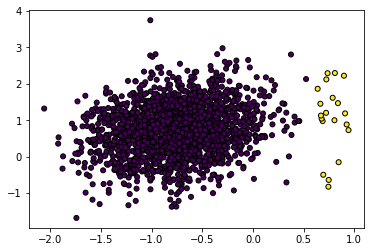

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# Make Initial Classification

In [8]:
from sklearn.svm import SVC

svc_no_imb = SVC(gamma='auto')
svc_no_imb.fit(X,y)

SVC(gamma='auto')

In [9]:
# function to plot decision boundary of a classifier
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

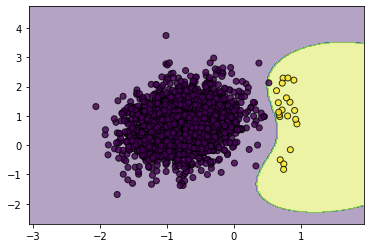

In [10]:
#fig, ax = plt.figure(figsize=(15,12))
ax = plt.axes()
plot_decision_function(X,y, svc_no_imb,ax)

In [11]:
from sklearn.metrics import balanced_accuracy_score

 